### ML model

##### Import Library

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [9]:
selected_feat_df = pd.read_csv('../data/Preprocessed_data.csv')
selected_feat_df.dropna(inplace = True)
selected_feat_df.head(5)

,id,driver_id,driver_action,Trip ID,Trip_Origin_lat,Trip_Origin_lng,Trip_Destination_lat,Trip_Destination_lng,distance,day_of_month,weekday,month_pick,hour_pick,duration,Holiday
0,1,243828,accepted,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,Thursday,7.0,9.0,217.0,False
1,2,243588,rejected,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,Thursday,7.0,9.0,217.0,False
2,3,243830,rejected,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,Thursday,7.0,9.0,217.0,False
3,4,243539,rejected,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,Thursday,7.0,9.0,217.0,False
4,5,171653,rejected,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,Thursday,7.0,9.0,217.0,False


In [10]:
selected_feat_df.isnull().sum()

id                      0
driver_id               0
driver_action           0
Trip ID                 0
Trip_Origin_lat         0
Trip_Origin_lng         0
Trip_Destination_lat    0
Trip_Destination_lng    0
distance                0
day_of_month            0
weekday                 0
month_pick              0
hour_pick               0
duration                0
Holiday                 0
dtype: int64

In [11]:
# identfying categorical values
non_numeric_columns = list(selected_feat_df.select_dtypes(exclude=[np.number]).columns)
print(non_numeric_columns)

['driver_action', 'weekday', 'Holiday']


In [12]:
# Encoder 
le = LabelEncoder()
for col in non_numeric_columns:
    selected_feat_df[col] = le.fit_transform(selected_feat_df[col])
selected_feat_df.head(5)

,id,driver_id,driver_action,Trip ID,Trip_Origin_lat,Trip_Origin_lng,Trip_Destination_lat,Trip_Destination_lng,distance,day_of_month,weekday,month_pick,hour_pick,duration,Holiday
0,1,243828,0,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,4,7.0,9.0,217.0,0
1,2,243588,1,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,4,7.0,9.0,217.0,0
2,3,243830,1,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,4,7.0,9.0,217.0,0
3,4,243539,1,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,4,7.0,9.0,217.0,0
4,5,171653,1,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,4,7.0,9.0,217.0,0


In [13]:
X_all = selected_feat_df.drop(["driver_action"], axis=1)
y_all = selected_feat_df["driver_action"]

In [14]:
# Train test split for the feature extracted dataframe

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y_all,test_size=0.2, random_state=10
)

#### Random ForestClassifier

In [8]:
# create model v
rnd = RandomForestClassifier()
  
# model
fit_rnd = rnd.fit(X_train_all,y_train_all)
  
# accuracy score
rnd_score = rnd.score(X_test_all,y_test_all) 
  

In [9]:
rnd_score

0.9816708662227136

XGBoost Model

In [ ]:
xg_score

Train one model using all variables and another using only the variables selected by the graph

In [21]:
from causalnex.discretiser.discretiser_strategy import (
    DecisionTreeSupervisedDiscretiserMethod,
)
features = list(selected_feat_df.columns)#.difference(['driver_action']))
tree_discretiser = DecisionTreeSupervisedDiscretiserMethod(
    mode='single', 
    tree_params={'max_depth': 2, 'random_state': 27},
)
tree_discretiser.fit(
    feat_names=features, 
    dataframe=selected_feat_df, 
    target_continuous=True,
    target='driver_action',
)

DecisionTreeSupervisedDiscretiserMethod(tree_params={'max_depth': 2,
                                                     'random_state': 27})

In [22]:
for col in features:
    selected_feat_df[col] = tree_discretiser.transform(selected_feat_df[[col]])

selected_feat_df.head()

,id,driver_id,driver_action,Trip ID,Trip_Origin_lat,Trip_Origin_lng,Trip_Destination_lat,Trip_Destination_lng,distance,day_of_month,weekday,month_pick,hour_pick,duration,Holiday
0,0,1,0,0,2,1,1,1,2,0,1,1,0,2,0
1,0,1,1,0,2,1,1,1,2,0,1,1,0,2,0
2,0,1,1,0,2,1,1,1,2,0,1,1,0,2,0
3,0,1,1,0,2,1,1,1,2,0,1,1,0,2,0
4,0,0,1,0,2,1,1,1,2,0,1,1,0,2,0


In [25]:
train, test = train_test_split(selected_feat_df, test_size=0.3, random_state=50)
print(f"Train set shape: {train.shape}\nHoldout set shape: {test.shape}")

Train set shape: (1089002, 15)
Holdout set shape: (466716, 15)


In [30]:
y = selected_feat_df.driver_action                          # M or B 
list = ['driver_action']
x = selected_feat_df.drop(list,axis = 1 )
x.head()

,id,driver_id,Trip ID,Trip_Origin_lat,Trip_Origin_lng,Trip_Destination_lat,Trip_Destination_lng,distance,day_of_month,weekday,month_pick,hour_pick,duration,Holiday
0,1,243828,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,4,7.0,9.0,217.0,0
1,2,243588,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,4,7.0,9.0,217.0,0
2,3,243830,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,4,7.0,9.0,217.0,0
3,4,243539,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,4,7.0,9.0,217.0,0
4,5,171653,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,4,7.0,9.0,217.0,0


<AxesSubplot: >

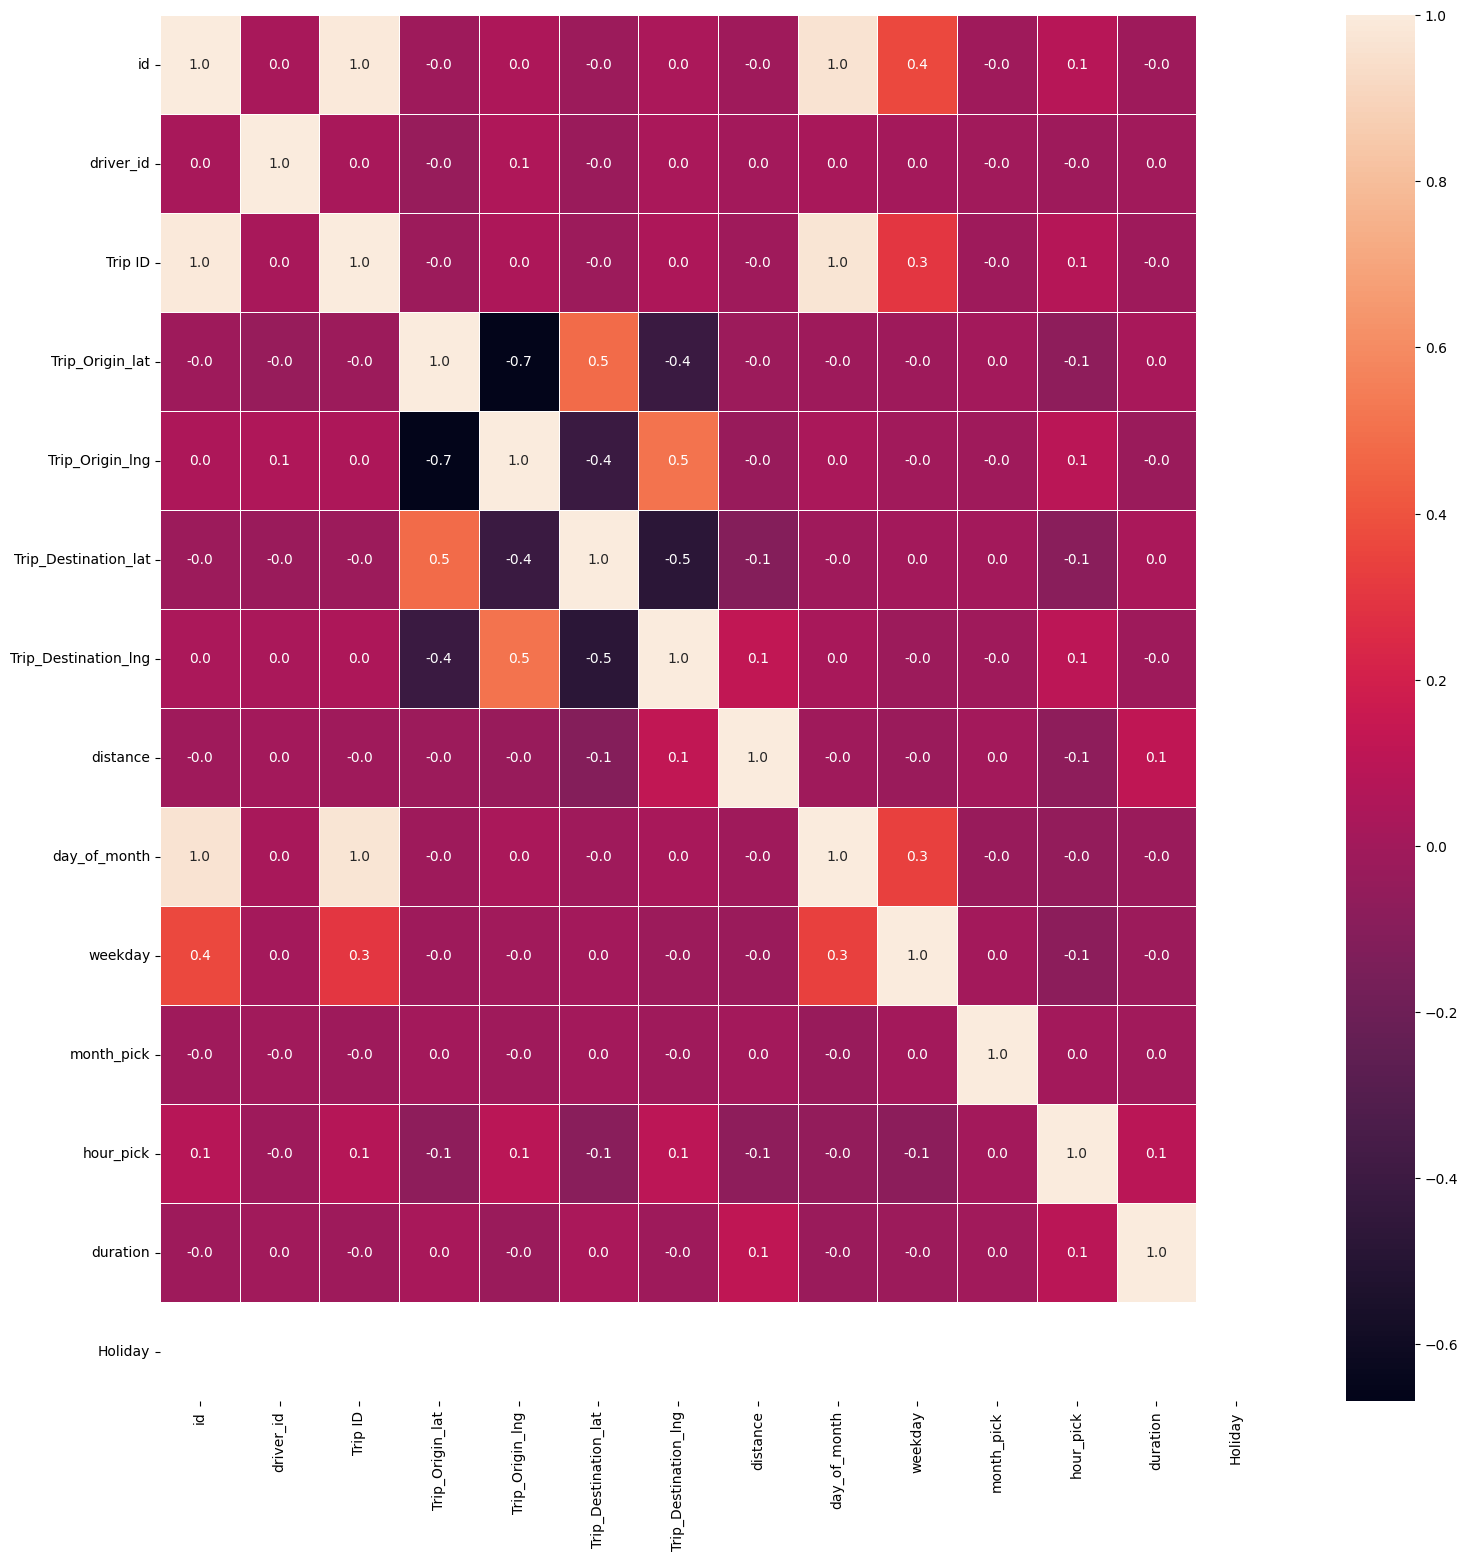

In [32]:
#correlation map
import matplotlib.pyplot as plt
x = selected_feat_df.drop(list,axis = 1 )
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [36]:
from sklearn.linear_model import LogisticRegression

In [39]:
X_train_all, X_test_all, y_train_all, y_test_all= train_test_split(X_all, y_all, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_all, y_all)

LogisticRegression()

In [40]:
y_pred = logreg.predict(X_test_all)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_all, y_test_all)))

Accuracy of logistic regression classifier on test set: 0.98
